# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [20]:
test = requests.get('https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=e536d4b819bd5c3c3e4f17c1a13a757d&q=portland').json()


{'coord': {'lon': -122.6762, 'lat': 45.5234},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 54.16,
  'feels_like': 52.79,
  'temp_min': 48.61,
  'temp_max': 58.23,
  'pressure': 1016,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 178, 'gust': 13},
 'clouds': {'all': 75},
 'dt': 1651360400,
 'sys': {'type': 2,
  'id': 2020319,
  'country': 'US',
  'sunrise': 1651323598,
  'sunset': 1651374937},
 'timezone': -25200,
 'id': 5746545,
 'name': 'Portland',
 'cod': 200}

In [29]:
test['main']
time.strftime('%x', time.gmtime(1651360400))

'04/30/22'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# build url for api calls
base_url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial'
cities_response = []

print('''Beginning Data Retrieval     
-----------------------------''')
count = 0
set_count = 1

# create for loop to grab api call result and print the cities grabed 
for i, h in enumerate(cities):
    count += 1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        count = 0
    param = {
        'q' : h,
        'appid' : weather_api_key
    }
    print(f'Processing Record {count} of Set {set_count} | {h}')
    try:
        weather_response = requests.get(base_url, params=param).json()
        cities_response.append({
                            'City': weather_response['name'],
                            'Lat' : weather_response['coord']['lat'],
                            'Lng' : weather_response['coord']['lon'],
                            'Max Temp' : weather_response['main']['temp_max'],
                            'Humidity' : weather_response['main']['humidity'],
                            'Cloudiness' : weather_response['clouds']['all'],
                            'Wind Speed' : weather_response['wind']['speed'],
                            'Country' : weather_response['sys']['country'],
                            'Date' : weather_response['dt']})        
    except:
        print('City not found. Skipping...')

print('''-----------------------------
Data Retrieval Complete
-----------------------------''')
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portland
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | araruama
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | dingli
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | lata
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | neuquen
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | ponta delgada
Processing Record 14 of Set 1 | pathein
Processing Record 15 of Set 1 | la uribe
City not found. Skipping...
Processing Record 16 of Set 1 | andenes
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | mogadishu
Processing Record 20 of Set 1 | gold coast
Processing Record 21 of Set 1 | janakpur
Processing Record 22 of Set 1 | ne

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
df = pd.DataFrame(cities_response)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,57.61,82,96,4.00,US,1651362828
1,Ushuaia,-54.8000,-68.3000,38.86,70,20,4.61,AR,1651363063
2,Araruama,-22.8728,-42.3431,71.80,92,99,5.73,BR,1651363064
3,Airai,-8.9266,125.4092,69.26,62,69,4.23,TL,1651363065
4,Dingli,35.8614,14.3822,59.81,67,0,9.22,MT,1651363065


In [36]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.913097,15.547998,60.333959,71.313076,60.215470,7.481547,1.651363e+09
std,33.582868,89.101176,19.490537,19.909425,37.085764,4.683746,1.226181e+02
min,-54.800000,-179.166700,5.520000,3.000000,0.000000,0.000000,1.651363e+09
25%,-8.076950,-61.987500,46.580000,63.000000,25.000000,4.000000,1.651363e+09
50%,25.901800,18.754200,62.190000,75.000000,71.000000,6.510000,1.651363e+09
75%,50.216750,90.156450,77.380000,85.000000,98.000000,9.965000,1.651363e+09
max,78.218600,178.416700,98.060000,100.000000,100.000000,24.160000,1.651363e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
df[df['Humidity'] <= 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,57.61,82,96,4.00,US,1651362828
1,Ushuaia,-54.8000,-68.3000,38.86,70,20,4.61,AR,1651363063
2,Araruama,-22.8728,-42.3431,71.80,92,99,5.73,BR,1651363064
3,Airai,-8.9266,125.4092,69.26,62,69,4.23,TL,1651363065
4,Dingli,35.8614,14.3822,59.81,67,0,9.22,MT,1651363065
...,...,...,...,...,...,...,...,...,...
538,Moerai,-22.4333,-151.3333,78.30,67,47,8.19,PF,1651363402
539,Naze,28.3667,129.4833,63.30,73,100,14.90,JP,1651363402
540,Nadym,65.5333,72.5167,23.74,97,100,7.74,RU,1651363403
541,Nioki,-2.7167,17.6833,71.29,90,34,1.14,CD,1651363404


In [46]:
#  Get the indices of cities that have humidity over 100%.
humid_todrop = df[df['Humidity'] > 100].index
humid_todrop

Int64Index([], dtype='int64')

In [48]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.drop(humid_todrop, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portland,45.5234,-122.6762,57.61,82,96,4.00,US,1651362828
1,Ushuaia,-54.8000,-68.3000,38.86,70,20,4.61,AR,1651363063
2,Araruama,-22.8728,-42.3431,71.80,92,99,5.73,BR,1651363064
3,Airai,-8.9266,125.4092,69.26,62,69,4.23,TL,1651363065
4,Dingli,35.8614,14.3822,59.81,67,0,9.22,MT,1651363065
...,...,...,...,...,...,...,...,...,...
538,Moerai,-22.4333,-151.3333,78.30,67,47,8.19,PF,1651363402
539,Naze,28.3667,129.4833,63.30,73,100,14.90,JP,1651363402
540,Nadym,65.5333,72.5167,23.74,97,100,7.74,RU,1651363403
541,Nioki,-2.7167,17.6833,71.29,90,34,1.14,CD,1651363404


In [103]:
# output the data frame to a csv file
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

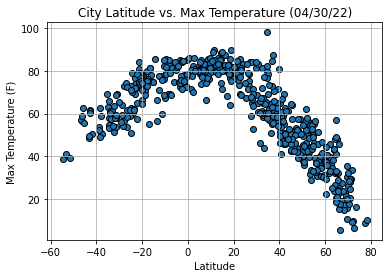

In [63]:
# plotting scatter graph between latitude and max temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolors='black')
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('output_data/Fig1')
plt.show()

The closer a city is to the equator, the higher the max temperature a city will experience. As long as the city is away from the equator, the city will have lower max temperature. The further away from the equator, the lower the max temperature will be.

## Latitude vs. Humidity Plot

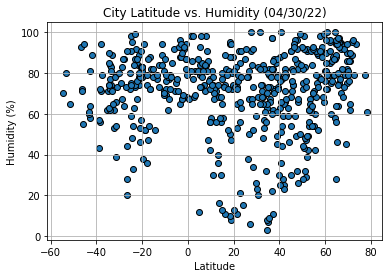

In [64]:
# plotting scatter graph between latitude and humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolors='black')
plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('output_data/Fig2')
plt.show()

There is not much relationship between humidity and latitude. Most of the humidity of different cities falls between 60 to 100 percent. 

## Latitude vs. Cloudiness Plot

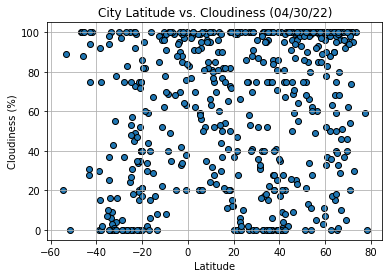

In [65]:
# plotting scatter graph between latitude and cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolors='black')
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('output_data/Fig3')
plt.show()

There doesn't seem to be a relationship between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

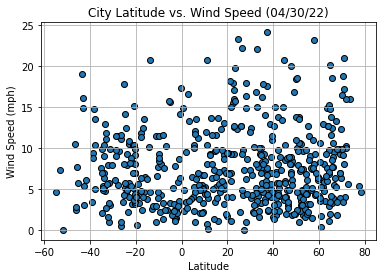

In [66]:
# plotting scatter graph between latitude and wind speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolors='black')
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%x")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output_data/Fig4')
plt.show()

There is not much correlation between city latitude and wind speed. 

## Linear Regression

In [72]:
# define a function for future graph plotting
def regress_plot(x, y, y_label, xy):
    slope, inter, r, p, stderr =linregress(x, y)
    regress_value = x * slope + inter
    regress_equ = f'y = {round(slope, 2)}x + {round(inter, 2)}'
    print(f'The r-value is: {r**2}')
    plt.scatter(x, y)
    plt.plot(x, regress_value, color='red')
    plt.annotate(regress_equ, xy, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [111]:
# create two data frame that separates northern and southern hemisphere
northern_df = clean_city_data[clean_city_data['Lat'] >= 0]
southern_df = clean_city_data[clean_city_data['Lat'] < 0]

The r-value is: 0.8250574519322563


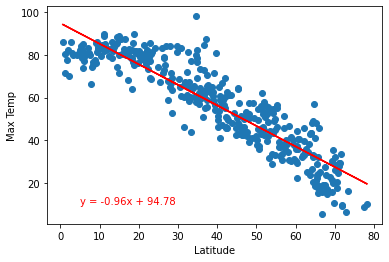

In [79]:
regress_plot(northern_df['Lat'], northern_df['Max Temp'], 'Max Temp', (5,10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6141211164662286


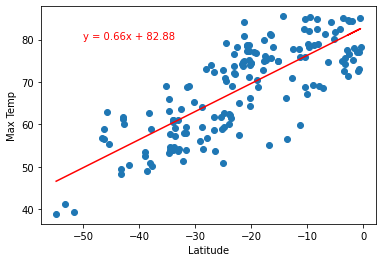

In [92]:
regress_plot(southern_df['Lat'], southern_df['Max Temp'], 'Max Temp', (-50,80))

When comparing between latitude and max temperature, the northern hemisphere has a negative association and the southern hemisphere has a positive association. For northern hemisphere, the higher the latitude gets, the lower the max temperature will be. The r-value for northern hemisphere is 0.8 which means it has a strong relationship. On the other hand which is the southern hemisphere, the higher the latitude gets, the higher the max temperature will be. It has a r-value of 0.6 which means it has moderate relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.033580575981249555


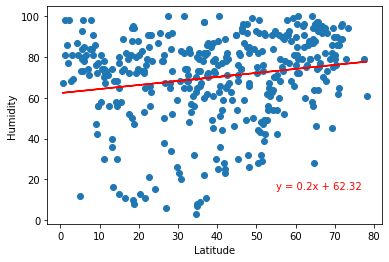

In [102]:
regress_plot(northern_df['Lat'], northern_df['Humidity'], 'Humidity', (55,15))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04669689449287789


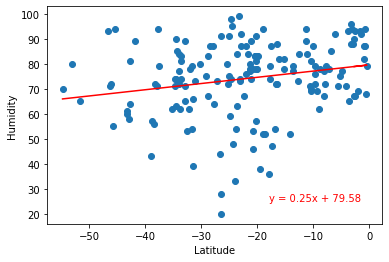

In [100]:
regress_plot(southern_df['Lat'], southern_df['Humidity'], 'Humidity', (-18,25))

When comparing the humidity and latitude, the northern and southern hemisphere both shows a positive liner relationship. However, the r-value for both hemisphere is so low that it is consider very weak to no relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.004881249437882924


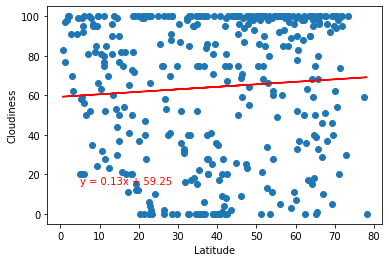

In [105]:
regress_plot(northern_df['Lat'], northern_df['Cloudiness'], 'Cloudiness', (5,15))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05423475623845483


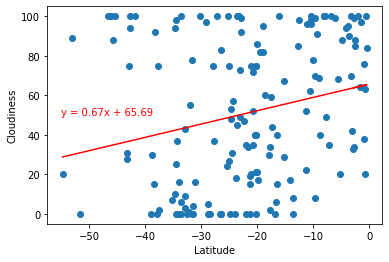

In [108]:
regress_plot(southern_df['Lat'], southern_df['Cloudiness'], 'Cloudiness', (-55,50))

When comparing cloudiness and latitude, it has a positive linear relationship. The r-value indicates there is very weak to no relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0011643411372411158


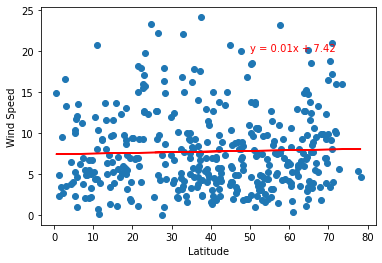

In [115]:
regress_plot(northern_df['Lat'], northern_df['Wind Speed'], 'Wind Speed', (50,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01618479776644589


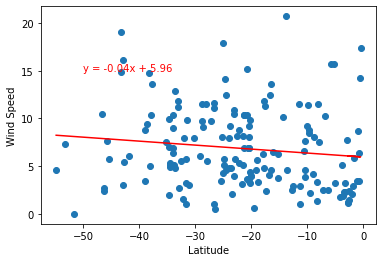

In [114]:
regress_plot(southern_df['Lat'], southern_df['Wind Speed'], 'Wind Speed', (-50,15))

When comparing the wind speed and latitude, the northern hemisphere has a positive linear relationship while the southern hemisphere has a negative linear relationship. However, the r-value for both case is so low where it can be consider a very weak to no relationship.